In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bb873b9ddfcd19f2ecc390d9e351546


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | eureka
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | sawakin
Processing Record 6 of Set 1 | les herbiers
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | itacoatiara
Processing Record 16 of Set 1 | verkhnevilyuysk
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | nisia floresta
Processing Record 21 of Set 1 | muros
Processing Record 22 of Set 1

Processing Record 33 of Set 4 | lac-au-saumon
Processing Record 34 of Set 4 | camara de lobos
Processing Record 35 of Set 4 | cayenne
Processing Record 36 of Set 4 | kilindoni
Processing Record 37 of Set 4 | havoysund
Processing Record 38 of Set 4 | batemans bay
Processing Record 39 of Set 4 | karagay
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | nuevitas
Processing Record 42 of Set 4 | semey
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | ostrovnoy
Processing Record 45 of Set 4 | salinas
Processing Record 46 of Set 4 | anloga
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | yatou
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | beian
Processing Record 2 of Set 5 | qitaihe
Processing Record 3 of Set 5 | pafos
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | caravelas
Processing Record 6 of Set 5 | mount isa
Processing Rec

Processing Record 30 of Set 8 | geraldton
Processing Record 31 of Set 8 | merauke
Processing Record 32 of Set 8 | marcona
City not found. Skipping...
Processing Record 33 of Set 8 | mantua
Processing Record 34 of Set 8 | savalou
Processing Record 35 of Set 8 | sao felix do xingu
Processing Record 36 of Set 8 | srivardhan
Processing Record 37 of Set 8 | souillac
Processing Record 38 of Set 8 | lidzbark warminski
Processing Record 39 of Set 8 | sept-iles
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | bani walid
Processing Record 42 of Set 8 | maneadero
Processing Record 43 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 8 | wahran
City not found. Skipping...
Processing Record 45 of Set 8 | kieta
Processing Record 46 of Set 8 | mabaruma
Processing Record 47 of Set 8 | vulcan
Processing Record 48 of Set 8 | beloha
Processing Record 49 of Set 8 | tiksi
Processing Record 50 of Set 8 | montevideo
Processing Record 1 of Set 9 | lompoc
Proce

Processing Record 16 of Set 12 | tarsus
Processing Record 17 of Set 12 | tiarei
Processing Record 18 of Set 12 | donghai
Processing Record 19 of Set 12 | haibowan
City not found. Skipping...
Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | great bend
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | quatre cocos
Processing Record 24 of Set 12 | katobu
Processing Record 25 of Set 12 | nome
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | normandin
Processing Record 28 of Set 12 | borlange
City not found. Skipping...
Processing Record 29 of Set 12 | sao gabriel da cachoeira
Processing Record 30 of Set 12 | kibala
Processing Record 31 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of Set 12 | allonnes
Processing Record 34 of Set 12 | makakilo city
Processing Record 35 of Set 12 | iqaluit
Processing Record 36 of Set 12 | biedenkopf
Proc

In [9]:
len(city_data)

560

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,62.01,48,40,12.75,ZA,2020-09-30 14:15:01
1,Yulara,-25.24,130.99,71.60,26,0,6.93,AU,2020-09-30 14:16:34
2,Eureka,40.80,-124.16,57.99,95,3,1.01,US,2020-09-30 14:13:38
3,Mahebourg,-20.41,57.70,73.40,78,40,6.93,MU,2020-09-30 14:16:34
4,Sawakin,19.11,37.33,91.31,55,0,9.28,SD,2020-09-30 14:16:35
5,Les Herbiers,46.87,-1.02,68.00,72,90,10.29,FR,2020-09-30 14:16:35
6,Albany,42.60,-73.97,57.99,85,92,10.96,US,2020-09-30 14:16:35
7,Rikitea,-23.12,-134.97,70.41,81,40,23.00,PF,2020-09-30 14:16:35
8,Cherskiy,68.75,161.30,39.02,74,100,9.91,RU,2020-09-30 14:16:36
9,Codrington,-38.27,141.97,45.90,85,12,11.27,AU,2020-09-30 14:16:11


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-09-30 14:15:01,-33.93,18.42,62.01,48,40,12.75
1,Yulara,AU,2020-09-30 14:16:34,-25.24,130.99,71.60,26,0,6.93
2,Eureka,US,2020-09-30 14:13:38,40.80,-124.16,57.99,95,3,1.01
3,Mahebourg,MU,2020-09-30 14:16:34,-20.41,57.70,73.40,78,40,6.93
4,Sawakin,SD,2020-09-30 14:16:35,19.11,37.33,91.31,55,0,9.28


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1601479775.1569495

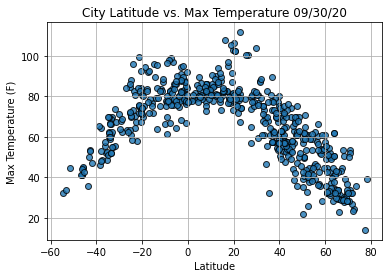

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

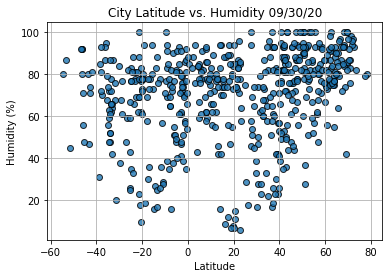

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

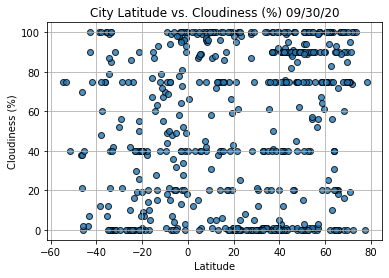

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

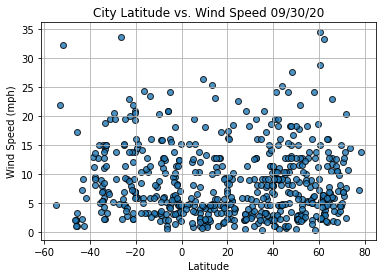

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [57]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    chart_title = title + " (R = " + str(round(r_value,3)) + ")"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Eureka,US,2020-09-30 14:13:38,40.80,-124.16,57.99,95,3,1.01
4,Sawakin,SD,2020-09-30 14:16:35,19.11,37.33,91.31,55,0,9.28
5,Les Herbiers,FR,2020-09-30 14:16:35,46.87,-1.02,68.00,72,90,10.29
6,Albany,US,2020-09-30 14:16:35,42.60,-73.97,57.99,85,92,10.96
8,Cherskiy,RU,2020-09-30 14:16:36,68.75,161.30,39.02,74,100,9.91
...,...,...,...,...,...,...,...,...,...
553,Riverton,US,2020-09-30 14:18:50,40.52,-111.94,48.99,52,0,2.06
554,Calenzano,IT,2020-09-30 14:16:04,43.86,11.16,75.99,44,40,4.70
555,Cay,TR,2020-09-30 14:18:50,38.59,31.03,71.60,30,40,4.70
557,Jiuquan,CN,2020-09-30 14:18:51,39.74,98.52,54.07,41,0,8.19


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

TypeError: can only concatenate str (not "numpy.float64") to str

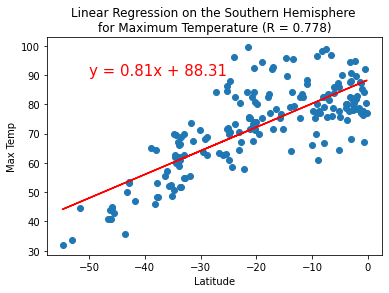

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

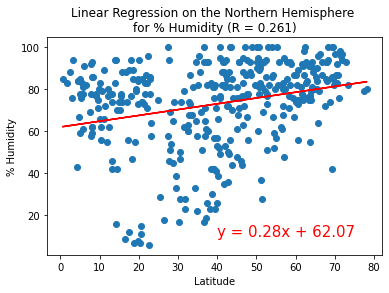

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \nfor % Humidity", '% Humidity',(40,10))

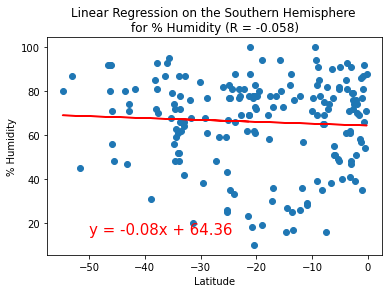

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

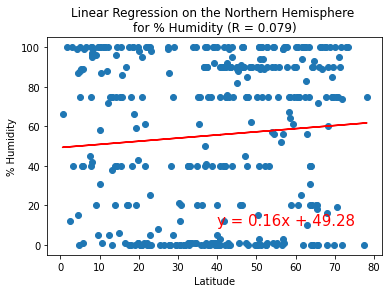

In [61]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \nfor % Humidity", '% Humidity',(40,10))

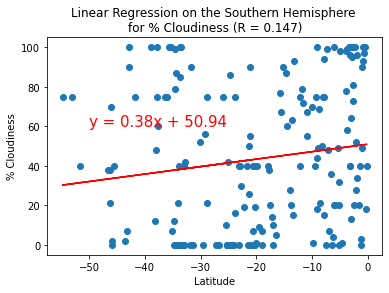

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

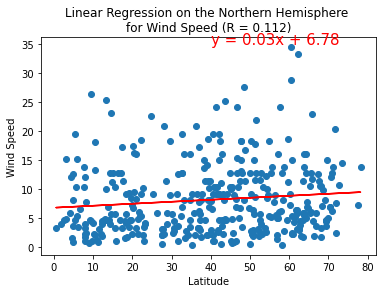

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

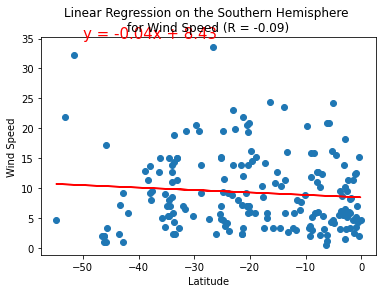

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))